

# Linear Classification 

Course: ITCS 4156 - Introduction to Machine Learning 

Instructor: Xiang Zhang

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Im}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

<br/>
<font color="blue"><b>

NAME: *Shardul Ladekar*

</b> </font>

## Goal

The goal of this activity is to practice our first classification algorithm: Rosenblatt's perceptron. Furthermore, we'll look at how we can use the pocket version of  Rosenblatt's perceptron to make sure we always using the best weights. To do so, we'll look at using the Iris dataset which is one of the most famous classical machine learning classification datasets.

Your job is to read through the lab and fill in any code segments that are marked by `TODO` headers and comments. **It should be noted, that all the correct outputs are given below each code cell. It might be useful to duplicate all the `TODO` cells so you can try to match the correct output with your own code!**

Use the `todo_check()`to help guide you in understanding whether your code for a given TODO is correct or incorrect. However, failing a TODO check doesn't mean you won't receive points, though it could be a good indication. If you are failing, feel free to ask and we can help check what is happening.

## Agenda

- Describe the Iris dataset classification problem
- Load the Iris dataset via Sklearn
- Visualize the Iris dataset
- Formulate and split Iris dataset into a binary classification problem using one-vs-all
- Create the data preparation pipeline where we apply data preprcessing AFTER splitting
- Implement Rosenblatt's perceptron with the pocket extension
- Investigate one-vs-all classification performance using different combinations of features

## Table of notation

| Symbol                     | Meaning                     | Symbol    | Meaning                                                          |
|----------------------------|-----------------------------|-----------|------------------------------------------------------------------|
| $\xv$ or $\vec{x}$         | feature/input vector        | $x_i$     | $i$th element of $\xv$                                           |
| $\Xm$                      | input matrix                | $x_{i,j}$ | $i$th row and $j$th column of $\Xm$                              |
| $\yv$ or $\tv$             | labels/targets              | $n$       | number of features or columns 
| $\wv$ or $\mathbf{\theta}$ | weight/parameter vector     | $m$       | number of data samples <br>(also used to refer to the slope) |samples or rows                                   |
| $f$ or $h$                 | hypothesis function <br> (i.e., a model)        | $\hat{\yv}$ <br> $f(\xv {;} \wv)$<br>$h(\xv {;} \wv)$ | predictions <br> y-hat |
| $E$              | error or sum of error (loss)  | $SSE$      | sum of squared error function                                            |
| $MSE$                      | mean squared error| $\nabla$  | gradient (nabla)                                       |
| $\partial$                 | partial derivative          | $\alpha$  | learning rate (alpha)                                  |       
| $J$ | general placeholder for <br>the objective function | $x^T$| transpose of a vector or matrix |
$b$ | bias or y-intercept term | $T$ | Threshold |
$*$| element-wise<br> multiplication | $\cdot$ | dot product|
| $z$<br>$\zv$| value before applying activation function | |  |

## Imports 

In [6]:
import gc
from typing import Tuple, Union, List

# Debugger
from IPython.core.debugger import set_trace

import sklearn
sklearn_version = '1.0'
# Check to make sure you have the right version of sklearn
assert sklearn.__version__  > sklearn_version, f'sklearn version is only {sklearn.__version__} and needs to be > {sklearn_version}'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

In [7]:
# Set this to True if you DO NOT want to run the 
# garbage_collect() functions throughout the notebook
turn_off_garbage_collect = False

def garbage_collect(vars_):
    if not turn_off_garbage_collect:
        for v in vars_:
            if v in globals():
                del globals()[v]
        collected = gc.collect()

def todo_check(condi_err):
    failed_err = "You passed {}/{} and FAILED the following code checks:{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(condi_err):
        if not condi:
            n_failed += 1
            failed += f"\nFailed check [{check+1}]:\n\t Tip: {err}"

    if len(failed) != 0:
        passed = len(condi_err) - n_failed
        err = failed_err.format(passed, len(condi_err), failed)
        raise AssertionError(err.format(failed))
    print("Your code PASSED the code check!")

# Problem statement summary and data loading

## Iris dataset problem summary

<!-- <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimgs.developpaper.com%2Fimgs%2F1981858-20200805133224053-2053756181.png&f=1&nofb=1"> -->


The data we are going to be using for this lab is the famous iris dataset. This dataset is a frequently used dataset when first being introduced to classification in machine learning. [Kaggles](https://www.kaggle.com/arshid/iris-flower-dataset)  description of the dataset is as follows:

> The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper. The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris dataset because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of 3 related species. The dataset consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). 4 features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Thus, the goal of this data is a 3-way multi-classification problem where we must classify each data sample either as an Iris setosa, Iris virginica or Iris versicolor.

## Loading the data
Famous datasets like this can often be found within machine learning packages, meaning all you have to do is import the dataset via a given package. For instance, Scikit Learn (sklearn) already has the Iris dataset built into its library. All we need to do is simply import it! 

#### TODO 1
Complete the TODO by loading the Iris dataset using Sklearn.

1. Import the `load_iris()` function from `sklearn.datasets` ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)).
2. Load the Iris dataset by calling the `load_iris()` function. Store the output into `iris`.

In [16]:
# TODO 1.1
from sklearn.datasets import load_iris
# TODO 1.2
iris = load_iris()

todo_check([
    (type(iris) == sklearn.utils.Bunch, "'iris' is not of type Bunch")
])

Your code PASSED the code check!


Once loaded, let's check the type of the our `iris` variable so we know how to manipulate our data. To do so we can use Python's built-in function `type()`.

In [17]:
type(iris)

sklearn.utils.Bunch

Hmmm, I don't think we have seen the type `sklearn.utils.Bunch` before. The first thing we should always do when we don't know what a variable's type represents is to check the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch) and printout the variable itself.

We can see in the Sklearn `Bunch` [docs](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch)  that it is an object describes as a "container object exposing keys as attributes." Looking at  the example code in the `Bunch` docs, we can see that it acts similar to a dictionary but with added functionality.

Below, we can see what happens when we printout the `iris` variable which contains a `Bunch` object instance. As we can see, it outputs a dictionary with keys and values where some of the keys seem to correspond to the Iris data while others seem to correspond to meta-data (information about our data).

In [18]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

So far, it looks like the `iris` variable is an instance of the Sklearn `Bunch` class and within said class instance is some data and meta-data relating to the iris dataset. But how do we access the actual data we need?

After a little research by reading the `Bunch` class and `load_iris()` function docs, it looks like each key seen in the above output actually corresponds to a class variable. This means we can access the data by accessing the class variables inside the `iris` instance.  

Before we do that, let's first print the keys of the `iris` class instance by calling `iris.keys()` instead of manually going through the large output above.

In [19]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Okay, now we can clearly see the keys. Let's try accessing this data and meta-data now. As mentioned, we can access the 'data' key of `iris` by treating it as an class variable and calling `iris.data`.

In [20]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Awesome, we can access the data! Let's check the data structure type of `iris.data`.

In [21]:
type(iris.data)

numpy.ndarray

Hey, look at that! `iris.data` returns the data in the form of a NumPy array. This means we can manipulate this data just like we have in previous labs! However, in the next section we'll convert this array to a DataFrame. 

Now that we know that `iris.data` is a NumPy array let's check the shape of our data.

In [22]:
iris.data.shape

(150, 4)

Nice, we can see that we have 150 data samples (rows) and 4 features (columns). Recall that each class has 50 samples and we have 3 classes. Let's now check the names of the features we will be working with by accessing the `feature_names` class variable.

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Ah, so we have 4 features: sepal length, sepal width, petal length, and petal width that are all in centimeters (cm). What do these features even refer to?

Well, we can see exactly what each feature corresponds to by looking at the below image! Notice, each iris has a sepal and a petal.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1400%2F0*_WfmSKzMX-u_xVyc.png&f=1&nofb=1">

Next, let's look at the labels for each class. We can do so by accessing the `target` class variable.

In [24]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
type(iris.target)

numpy.ndarray

Ah, here we can see the targets for each of our data samples (rows). It seems that there are 3 classes: 0, 1, and 2. Further we can see that `iris.target` is a NumPy array as well.

The last thing to do is check which label corresponds to which class (i.e., Iris type).

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Here we can see that label 0 corresponds to 'setosa', label 1 corresponds to 'versicolor', and label 2 corresponds to 'virginica' as the class labels in `iris.targets` correspond to the index of `iris.target_names`.** 

Recall, our goal for this dataset will be to classify a data sample based on the 4 features 'sepal length', 'sepal width', 'petal length', and 'petal width' into one of the three classes 'setosa', 'versicolor', 'virginica'!

## Converting to a DataFrame

Before moving on, let's covert the iris data into a Pandas DataFrame so we can reuse the data cleaning and transformation classes we defined in prior labs.

In [27]:
# We have to reshape iris.target so that it is a 2D array
# such that it can be stacked with iris.data
data = np.hstack([iris.data, iris.target.reshape(-1,1)])

# Removes the (cm) from iris.feature_names 
cleaned_feature_names = [name.replace(' (cm)', '') for name in iris.feature_names]
feature_names = np.hstack([cleaned_feature_names, 'class'])

iris_df = pd.DataFrame(data, columns=feature_names)
display(iris_df)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# Visualization and exploration

Alright, so we have loaded our data and foramtted it as a DataFrame. Let's now do some visualization and exploration to get a better understand for how our features relate to one another. Our goal here is to compare our features such that we want to see if any of the features allow for any of our classes to be linearly separable! 

Notice that for classification tasks **we are interested in comparing every feature against every other feature** instead of comparing against the labels. This because comparing against the labels stored in the 'class' column doesn't make any sense, since they are discrete values (meaning, you cant really gain any insight into trends or correlations when comparing continuous features against discrete classes)!

Before we get started we first need to find the location of the data samples for each iris class. Recall, based on the above Sklearn investigation, setosa corresponds to label 0, versicolor corresponds to label 1, and virginica correspond to label 2.

To do so, we can use the `np.where()` function which allow us to check where our class labels `iris_df['class']` are equal to 0. 

In [28]:
setosa_locs = np.where(iris_df['class'] == 0)
setosa_locs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)

Notice that `setosa_locs` returns a tuple where the first element is an array. To understand why this is the case see this `np.where()` [post](https://stackoverflow.com/questions/50646102/what-is-the-purpose-of-numpy-where-returning-a-tuple). Since we don't want a tuple we can index `setosa_locs` as follows. 

In [ ]:
setosa_locs[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

#### TODO 2
Complete the TODO by finding the locations of the data samples for each iris flower type. 

**Hint: Use the code for how we found all the `setosa_locs` as an example!**

1. Using `iris_df`, find the location of all the data sample locations for the versicolor class which has a label of 1. To do so, use NumPy's `np.where()` function.

1. Using `iris_df`, find the location of all the data sample locations for the virginica class which has a label of 2. To do so, use NumPy's `np.where()` function.

In [30]:
setosa_locs = np.where(iris_df['class'] == 0)[0]

# TODO 2.1
versicolor_locs = np.where(iris_df['class'] == 1)[0]
# TODO 2.2
virginica_locs = np.where(iris_df['class'] == 2)[0]

todo_check([
    (type(versicolor_locs) is np.ndarray, "'versicolor_locs' is not type np.ndarray. Make sure you indexed np.where() currently!"),
    (type(virginica_locs) is np.ndarray, "'virginica_locs' is not type np.ndarray. Make sure you indexed np.where() currently!"),
    (versicolor_locs[0] == 50, "'versicolor_locs' has an incorrect value"),
    (virginica_locs[0] == 100, "'virginica_locs' has an incorrect value"),
])

Your code PASSED the code check!


Below we print out the number of data samples for each class and the indexes.

In [33]:
print(f"Setosa sample count: {len(setosa_locs)}")
setosa_locs

Setosa sample count: 50


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [34]:
print(f"Versicolor sample count: {len(setosa_locs)}")
versicolor_locs

Versicolor sample count: 50


array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [35]:
print(f"Virginica sample count: {len(setosa_locs)}")
virginica_locs

Virginica sample count: 50


array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])

As we can see, the first 50 samples correspond to setosa, the next 50 samples correspond to versicolor, and the last 50 samples correspond to virginica. 

## Sepal length vs width

For our first visualization, let's start by just comparing 'sepal length' vs 'sepal width' where we will plot each class as a different color. By doing so we can observer if any of the classes are linearly separable from the rest.

#### TODO 3
Complete the TODO by filling in the code for plotting the sepal length and width features against each other for each iris flowers. The resulting plot should match the below plot image. 

<img src="https://live.staticflickr.com/65535/51928822505_a927b494d4_c.jpg" width="300" height="300" alt="lab-5_3">



1. Using all the **setosa data samples ONLY**, index the **'sepal length'** feature from the `iris_df`. Store the output into `setosa_sepal_length`
    1. Hint: Recall `.loc[]` requires two inputs, one for rows and one for columns as follows: `.loc[rows, columns]`. The rows we need to access are stored in `setosa_locs`!

1. Using TODO 3.1 as an example, index the **'sepal width'** feature from the `iris_df` for all the **setosa data samples**. Store the output into `setosa_sepal_width`

1.  Using TODO 3.1 as an example, index the **'sepal length'** feature from the `iris_df` for all the **versicolor data samples**. Store the output into `versicolor_sepal_length`

1. Using TODO 3.1 as an example, index the **'sepal width'** feature from the `iris_df` for all the **versicolor data samples**. Store the output into `versicolor_sepal_width`

1.  Using TODO 3.1 as an example, index the **'sepal length'** feature from the `iris_df` for all the **virginica data samples**. Store the output into `virginica_sepal_length`

1. Using TODO 3.1 as an example, index the **'sepal width'** feature from the `iris_df` for all the **virginica data samples**. Store the output into `virginica_sepal_width`

1. Plot the setosa sepal features we just extracted using `plt.scatter()` [docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). Make sure `setosa_sepal_length` is plotted on the x-axis and `setosa_sepal_width` is plotted on the y-axis. Additionally, pass the following keyword arguments:
    1. `label='setosa'` which will allow the legend to label each data sample plotted as the correct class.

1. Plot the versicolor sepal features we just extracted using `plt.scatter()`. Make sure `versicolor_sepal_length` is plotted on the x-axis and `versicolor_sepal_width` is plotted on the y-axis. Additionally, pass the following keyword arguments:
    1. `label='versicolor'` which will allow the legend to label each data sample plotted as the correct class.

1. Plot the virginica sepal features we just extracted using `plt.scatter()`. Make sure `virginica_sepal_length` is plotted on the x-axis and `virginica_sepal_width` is plotted on the y-axis. Additionally, pass the following keyword arguments:
    1. `label='virginica'` which will allow the legend to label each data sample plotted as the correct class.

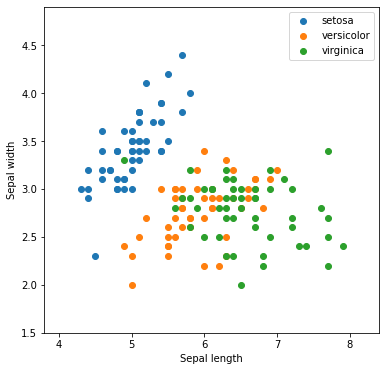

Your code PASSED the code check!


In [37]:
def plot_sepal_length_width():    
    # TODO 3.1
    setosa_sepal_length = iris_df.loc[setosa_locs,'sepal length']
    # TODO 3.2
    setosa_sepal_width = iris_df.loc[setosa_locs,'sepal width']

    # TODO 3.3
    versicolor_sepal_length = iris_df.loc[versicolor_locs,'sepal length']
    # TODO 3.4
    versicolor_sepal_width = iris_df.loc[versicolor_locs,'sepal width']

    # TODO 3.5
    virginica_sepal_length = iris_df.loc[virginica_locs,'sepal length']
    # TODO 3.6
    virginica_sepal_width = iris_df.loc[virginica_locs,'sepal width']

    # Find min and max x-y coordiantes and add some buffer space for plotting (i.e., +- .5)
    x_min = iris_df.loc[:, 'sepal length'].min() - .5
    x_max = iris_df.loc[:, 'sepal length'].max() + .5
    y_min = iris_df.loc[:, 'sepal width'].min() - .5
    y_max = iris_df.loc[:, 'sepal width'].max() + .5

    # Set figure size for each plot
    plt.figure(figsize=(6,6))

    # TODO 3.7
    plt.scatter(setosa_sepal_length,setosa_sepal_width,label='setosa')
    # TODO 3.8
    plt.scatter(versicolor_sepal_length,versicolor_sepal_width,label='versicolor')
    # TODO 3.9
    plt.scatter(virginica_sepal_length,versicolor_sepal_width,label='virginica')

    # Set plot settings
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend() # Plots legend
    plt.show()

    todo_check([
        (np.all(setosa_sepal_length.values.flatten()[:3] == [5.1, 4.9, 4.7]), "'setosa_sepal_length' contains incorrect values!"),
        (np.all(setosa_sepal_width.values.flatten()[:3] == [3.5, 3. , 3.2]), "'setosa_sepal_width' contains incorrect values!"),
        (np.all(versicolor_sepal_length.values.flatten()[:3] == [7. , 6.4, 6.9]),"'versicolor_sepal_length' contains incorrect values!"),
        (np.all(versicolor_sepal_width.values.flatten()[:3] == [3.2, 3.2, 3.1]),"'versicolor_sepal_width' contains incorrect values!"),
        (np.all(virginica_sepal_length.values.flatten()[:3] == [6.3, 5.8, 7.1]),"'virginica_sepal_length' contains incorrect values!"),
        (np.all(virginica_sepal_width.values.flatten()[:3] == [3.3, 2.7, 3.]),"'virginica_sepal_width' contains incorrect values!"),
    ])
    
plot_sepal_length_width()

Interesting! Here we can see that the setosa flower sepal width and length are quite distinguishable from the rest of the classes. How can we tell this? Easy, just imagine drawing a line between the setosa data points (blue) and versicolor (orange) and virginica (green). 

On the other hand, the versicolor and virginica flowers sepal features seem to be quite intertwined, therefore it will likely be harder to distinguish between them.

## Petal length vs width

Next, lets make the same visualization but this time let's compare just the 'petal length' and 'petal width' features to see if they present the classes as being linearly separable as well. 

#### TODO 4
Complete the TODO by filling in the code for selecting only the petal length and width features against each other for each iris flowers. The resulting plot should match the below plot image. 

<img src="https://live.staticflickr.com/65535/51928822510_5dfb1037a7_c.jpg" width="300" height="300" alt="lab-5_4">



1. Using all the **setosa data samples ONLY**, index the **'petal length'** feature from the `iris_df`. Store the output into `setosa_petal_length`
    1. Hint: Recall `.loc[]` requires two inputs, one for rows and one for columns as follows: `.loc[rows, columns]`. The rows we need to access are stored in `setosa_locs`!

1. Using TODO 4.1 as an example, index the **'petal width'** feature from the `iris_df` for all the **setosa data samples**. Store the output into `setosa_petal_width`

1.  Using TODO 4.1 as an example, index the **'petal length'** feature from the `iris_df` for all the **versicolor data samples**. Store the output into `versicolor_petal_length`

1. Using TODO 4.1 as an example, index the **'petal width'** feature from the `iris_df` for all the **versicolor data samples**. Store the output into `versicolor_petal_width`

1.  Using TODO 4.1 as an example, index the **'petal length'** feature from the `iris_df` for all the **virginica data samples**. Store the output into `virginica_petal_length`

1. Using TODO 4.1 as an example, index the **'petal width'** feature from the `iris_df` for all the **virginica data samples**. Store the output into `virginica_petal_width`

1. Plot the setosa petal features we just extracted using `plt.scatter()`. Make sure `setosa_petal_length` is plotted on the x-axis and `setosa_petal_width` is plotted on the y-axis. Additionally, pass the following keyword arguments:
    1. `label='setosa'` which will allow the legend to label each data sample plotted as the correct class.

1. Plot the versicolor petal features we just extracted using `plt.scatter()`. Make sure `versicolor_petal_length` is plotted on the x-axis and `versicolor_petal_width` is plotted on the y-axis. Additionally, pass the following keyword arguments:
    1. `label='versicolor'` which will allow the legend to label each data sample plotted as the correct class.

1. Plot the virginica petal features we just extracted using `plt.scatter()`. Make sure `virginica_petal_length` is plotted on the x-axis and `virginica_petal_width` is plotted on the y-axis. Additionally, pass the following keyword arguments:
    1. `label='virginica'` which will allow the legend to label each data sample plotted as the correct class.

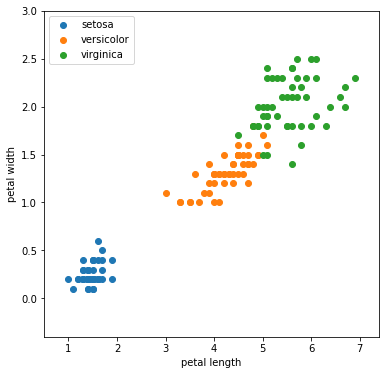

Your code PASSED the code check!


In [42]:
def plot_petal_length_width():    
    # TODO 4.1
    setosa_petal_length = iris_df.loc[setosa_locs,'petal length']
    # TODO 4.2
    setosa_petal_width = iris_df.loc[setosa_locs,'petal width']

    # TODO 4.3
    versicolor_petal_length = iris_df.loc[versicolor_locs,'petal length']
    # TODO 4.4
    versicolor_petal_width = iris_df.loc[versicolor_locs,'petal width']

    # TODO 4.5
    virginica_petal_length = iris_df.loc[virginica_locs,'petal length']
    # TODO 4.6
    virginica_petal_width = iris_df.loc[virginica_locs,'petal width']

    # Find min and max x-y coordiantes and add some buffer space for plotting (i.e., +- .5)
    x_min = iris_df.loc[:, 'petal length'].min() - .5
    x_max = iris_df.loc[:, 'petal length'].max() + .5
    y_min = iris_df.loc[:, 'petal width'].min() - .5
    y_max = iris_df.loc[:, 'petal width'].max() + .5

    # Set figure size for each plot
    plt.figure(figsize=(6,6))

    # TODO 4.7
    plt.scatter(setosa_petal_length,setosa_petal_width,label='setosa')
    # TODO 4.8
    plt.scatter(versicolor_petal_length,versicolor_petal_width,label='versicolor')
    # TODO 4.9
    plt.scatter(virginica_petal_length,virginica_petal_width,label='virginica')

    # Set plot settings
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend() # Plots legend
    plt.show()

    todo_check([
        (np.all(setosa_petal_length.values.flatten()[:3] == [1.4, 1.4, 1.3]), "'setosa_petal_length' contains incorrect values!"),
        (np.all(setosa_petal_width.values.flatten()[:3] == [0.2, 0.2, 0.2]),"'setosa_petal_width' contains incorrect values!"),
        (np.all(versicolor_petal_length.values.flatten()[:3] == [4.7, 4.5, 4.9]),"'versicolor_petal_length' contains incorrect values!"),
        (np.all(versicolor_petal_width.values.flatten()[:3] == [1.4, 1.5, 1.5]),"'versicolor_petal_width' contains incorrect values!"),
        (np.all(virginica_petal_length.values.flatten()[:3] == [6. , 5.1, 5.9]),"'virginica_petal_length' contains incorrect values!"),
        (np.all(virginica_petal_width.values.flatten()[:3] == [2.5, 1.9, 2.1]),"'virginica_petal_width' contains incorrect values!"),
    ])
plot_petal_length_width()

Take a second to think about what this plot is telling us. How distinguishable are the features for each flower from one another?

If you're thinking that all classes seem relatively separable (more so than the sepal length and width) you're on the right track! There is a slight exception with versicolor and virginica again as their petal features slightly overlap. Regardless, the petal features could be really good features to use for classification based on this visualization.

*Note, If you are also thinking that all the classes show a linear trend as well you're also on the right track! Each flower petal length seems to grow with petal width.*

## All features against each other

Now, let's plot all our features against one another and see if our classes are still linear separable. We can do so using Seaborn's `pairplot()` function. Recall, Seaborn is just a high-level wrapper of Matplotlib that allows for more complex plots in few lines of code. Also they tend to be much prettier! 

Typically, Seaborn works by taking in a DataFrame and plotting the columns of the DataFrame. Notice that the `hue` argument takes in the name 'class' which is the column in our `iris_df` that contains the labels for each data sample. Thus, Seaborn determines the colors of each data sample based on the 'class' column! If you are interested in how `pairplot()` works see the [docs](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

The `pairplot()` plots all our features against each other. Therefore, the plots are duplicated across the main diagonal, however the axises are switched. Further, the main diagonal shows each feature plotted against its self. However, instead of actually plotting each feature against itself, it shows the distribution of the feature values for each class. For instance, when looking at sepal length, we can see the distribution of the values of sepal length for each class.

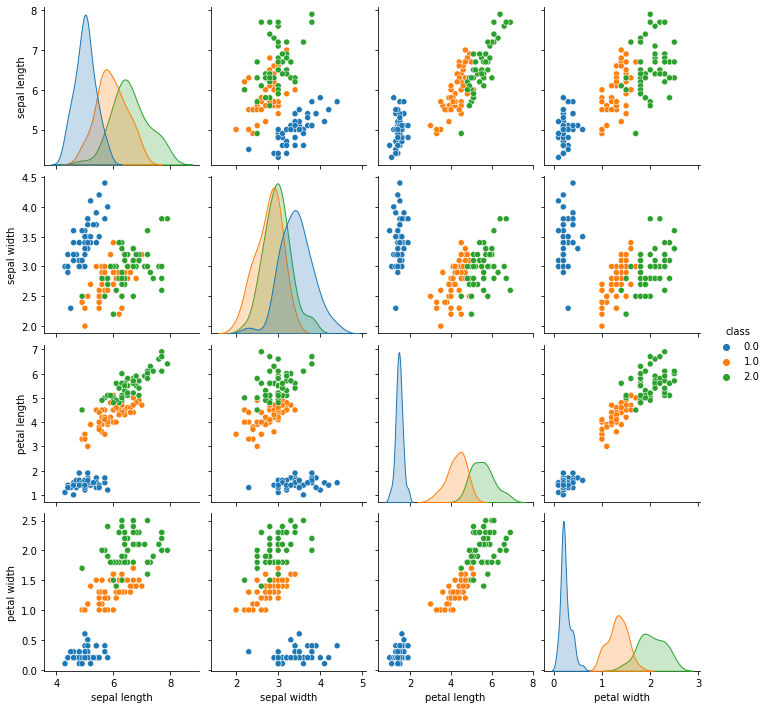

In [38]:
import seaborn as sns
sns.pairplot(iris_df, hue='class', palette="tab10");

Take a few seconds to see if you can find any other feature combinations that make the classes more linear separable. If you don't know which color corresponds to which class look at the legend. Further, recall the following labels-to-class mapping:

- setosa = label 0
- versicolor = label 1
- virginica = label 2.


Notice that sepal width plotted against petal length also seems to relatively separable!

# Data Preparation Pipeline

Now it's time to recreate our data preparation pipelines we used in prior weeks. In this lab we will, **once again, apply all our data cleaning and transformation operations after splitting the data.** Further, we need to reformulate the iris dataset as a binary classification problem as currently the iris dataset has 3 classes which means it is a multi-classification problem.

## Formulating the binary classification problem

Recall that Rosenblatt's perceptron only works for binary classification problems. Are you noticing an issue here? Remember how the iris dataset has 3 classes? This means the iris data is a multi-classification problem! The question is then as follows: how do we perform binary classification when we have more than 2 classes?

In [39]:
# Classes in the iris dataset
iris_df['class'].unique()

array([0., 1., 2.])

We have two choices when answering this question.

1. One-vs-one: The first choice is to select only 2 classes from the data. For example, we could choose to classify only setosa and versicolor. Here we can assign either class to be the positive or negative class. **Thus, we end up with a classification problem where the goal is the predict if a data sample is a setosa or versicolor.** (Note we could easily have chosen versicolor and virginica to classify instead - the choice is up to you.)

2. One-vs-all: The second choice is to perform one-vs-all classification. This entails selecting one class to as the "positive" class and then setting the rest of the classes to be the "negative" class. For example, we could choose setosa as our positive class. Thus, we then treat both virginica and versicolor as the negative class. **Thus, we end up with a classification problem where the goal is the predict if a data sample is a setosa or not.** Below is an example of one-vs-all classification given 3 classes.

<img src="https://miro.medium.com/max/1400/1*RElrybCZ4WPsUfRwDl7fqA.png" width=400 height=400>

### Creating binary classes
Before we create a function to create binary classes, let's review some useful Pandas functions that will help us to do this.

One really useful Pandas DataFrame method is the `isin(values=)` method ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)). This method tells us whether if each element in passed to `values` is contained in the DataFrame. The `values` argument can be a list, tuple, or any other iterable object. Thus, the `isin()` method checks if any element in the list is in the DataFrame. 

For example, let's say we wanted to see if the `iris_df` 'class' column contains the labels 1 and 2, then we would do the following. 

In [40]:
labels_1_2 = iris_df.loc[:, 'class'].isin([1, 2])
labels_1_2

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: class, Length: 150, dtype: bool

First, notice that we passed a `list`! If you pass just an `int` then Pandas will throw an error!

Additionally, notice, the output is a boolean Pandas Series (this is essentially just a DataFrame with 1 column only). Any element that is `True` means the value was **either** a 1 or 2. Any element that is `False` means the value was **neither** a 1 or 2.

This means, we can use the `.isin()` method to find data samples! Recall, we can use boolean arrays to index DataFrames and NumPy arrays. We can do so by simply indexing our `iris_df` by the `labels_1_2` Pandas Series.

Finally, we can call the `.copy()` method so that if we need to change the labels it doesn't affect the original `iris_df`!

In [41]:
labels_1_2_df = iris_df[labels_1_2].copy()
labels_1_2_df.reset_index()

garbage_collect(['labels_1_2_df'])

Notice, we now only have 100 samples as we have extracted all the data samples with either a label 1 or 2!

#### TODO 5
Complete the `binarize_classes()` function which converts the Iris dataset into either a one-vs-one or one-vs-all classification problem.

1. Index the labels stored inside `iris_df` by indexing the 'class' column. Store the output into `labels`.

1. As we did above, find all the **positive** data sample locations using `labels` and the `isin()` method. The class labels which correspond to the positive class are stored inside the `pos_class` argument. Store the output into `pos_locs`.

1. Index all the positive data samples using the positive data sample locations stored inside `pos_locs`. Once indexed using `pos_locs`, call the `.copy()` to prevent any changes to labels from affecting the original `iris_df`.

1. As we did above, find all the **negative** data sample locations using `labels` and the `isin()` method. The class labels which correspond to the negative class are stored inside the `neg_class` argument. Store the output into `neg_locs`.

1. Index all the negative data samples using the negative data sample locations stored inside `neg_locs`. Once indexed using `neg_locs`, call the `.copy()` to prevent any changes to labels from affecting the `iris_df`.

In [45]:
def binarize_classes(
    iris_df: pd.DataFrame, 
    pos_class: List, 
    neg_class: List
) -> pd.DataFrame:
    """
        Converts data into a one-vs-all or one-vs-one prolbem

        Args:
            iris_df: DataFrame contianing iris data

            pos_class: list of labels that will be used for 
                the positive class.

            neg_class: list of labels that will be used for 
                the negative class.

        Returns:
            Returns a Pandas DataFrame with data formatted as a 
            one-vs-one or one-vs-all problem.
    """
    # TODO 5.1
    labels = iris_df['class']
    # TODO 5.2
    pos_locs = iris_df['class'].isin(pos_class)
    # TODO 5.3
    pos_df = iris_df[pos_locs].copy()

    # Set all labels/classes used for postive class to
    # have label 1
    pos_df.loc[:, 'class'] = 1
    
    # TODO 5.4
    neg_locs = iris_df['class'].isin(neg_class)
    # TODO 5.5
    neg_df = iris_df[neg_locs].copy()
    
    # Set all labels/classes used for negative class to
    # have label -1
    neg_df.loc[:, 'class'] = -1
    
    return pd.concat([pos_df, neg_df])

Run the `TEST_binarize_classes1` and `TEST_binarize_classes2` functions below to check your implementation of the `binarize_classes()` function. 

The `TEST_binarize_classes1()` function below creates a **one-vs-one** setup where setosa (label was previously 0) is the positive class and versicolor (label was previously 1) is the negative class. Here are somethings to notice:

1. First, notice how the function changes all labels to be either 1 for the positive class or -1 for the negative class.
1. Second, notice how all the virginica data samples are dropped.
1. Lastly, notice that we pass a **list** of labels for the `pos_class` and `neg_class` arguments even when passing only one label for each!

In [46]:
def TEST_binarize_classes1():
    
    one_vs_one = binarize_classes(iris_df, pos_class=[0], neg_class=[1])
    display(one_vs_one)
    print(f"one_vs_one labels: {one_vs_one['class'].unique()}")

    todo_check([
        (np.all(one_vs_one['class'].unique() == [1, -1]), "'binarize_classes()' returned the wrong class labels. Check to make sure you used the correct classes."),
        (np.all(one_vs_one.loc[4].values == [5.0, 3.6, 1.4, 0.2, 1.0]), "'binarize_classes()' potentially returned the wrong data values. Check to make sure you used the correct classes."),
        (np.all(one_vs_one.loc[95].values == [5.7, 3.0, 4.2, 1.2, -1.0]), "'binarize_classes()' potentially returned the wrong data values. Check to make sure you used the correct classes."),
    ])
    
TEST_binarize_classes1()
garbage_collect(['TEST_binarize_classes1'])

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,-1
96,5.7,2.9,4.2,1.3,-1
97,6.2,2.9,4.3,1.3,-1
98,5.1,2.5,3.0,1.1,-1


one_vs_one labels: [ 1 -1]
Your code PASSED the code check!


The `TEST_binarize_classes2()` function below creates a **one-vs-all** setup where setosa (label was previously 0 and now denoted 1) is the positive class and versicolor (label was previously 1) and virginica (label was previously 2) are the negative class (now denoted with -1).

In [ ]:
def TEST_binarize_classes2():
    one_vs_all = binarize_classes(iris_df, pos_class=[0], neg_class=[1, 2])
    display(one_vs_all)
    print(f"one_vs_all labels: {one_vs_all['class'].unique()}")

    todo_check([
        (np.all(one_vs_all['class'].unique() == [1, -1]), "'binarize_classes()' returned the wrong class labels. Check to make sure you used the correct classes."),
        (np.all(one_vs_all.loc[4].values == [5.0, 3.6, 1.4, 0.2, 1.0]), "'binarize_classes()' potentially returned the wrong data values. Check to make sure you used the correct classes."),
        (np.all(one_vs_all.loc[95].values == [5.7, 3.0, 4.2, 1.2, -1.0]), "'binarize_classes()' potentially returned the wrong data values. Check to make sure you used the correct classes."),
    ])
    
TEST_binarize_classes2()
garbage_collect(['TEST_binarize_classes2'])

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1
146,6.3,2.5,5.0,1.9,-1
147,6.5,3.0,5.2,2.0,-1
148,6.2,3.4,5.4,2.3,-1


one_vs_all labels: [ 1 -1]
Your code PASSED the code check!


## Splitting data

Next, it's time to split our data like we have done in prior labs. 

Notice, we have slightly updated the `feature_label_split()` function to be more general by adding an argument `label_name` which takes a string.

In [47]:
def feature_label_split(df: pd.DataFrame, 
                        label_name: str) -> Tuple[pd.DataFrame]:
    """ Split dataframe into features and labels
    
        Args:
            df: DataFrame containing both features and labels
            
            label_name: Name of the column which contains the labels
    """
    
    X = df.drop(label_name, axis=1)
    y = df[[label_name]].copy()
    
    return X, y

Below is an example of how to call the `feature_label_split()` function.

In [48]:
def TEST_feature_label_split():
    X, y = feature_label_split(iris_df, label_name='class')
    display(X)
    display(y)
    
TEST_feature_label_split()
garbage_collect(['TEST_feature_label_split'])

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


Likewise, we have slightly updated the `train_valid_test_split()` function to be more general by adding an argument `test_size` which takes a float and determines the split size.

In [49]:
from sklearn.model_selection import train_test_split

def train_valid_test_split(X, y, test_size=.2, seed=42):
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=test_size, random_state=seed)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=test_size, random_state=seed)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

Below is an example of how to call both functions `feature_label_split()` and `train_valid_test_split()` to split the data into train, validation, and test sets.

In [50]:
def TEST_train_valid_test_split():
    # Split into features and labels
    X, y = feature_label_split(iris_df, label_name='class')
    # Split into train, validation, and test sets
    data = train_valid_test_split(X, y)
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = data

    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")
    print(f"X_vld shape: {X_vld.shape}")
    print(f"y_vld shape: {y_vld.shape}")
    print(f"X_tst shape: {X_tst.shape}")
    print(f"y_tst shape: {y_tst.shape}")
    
TEST_train_valid_test_split()
garbage_collect(['TEST_train_valid_test_split'])

X_trn shape: (96, 4)
y_trn shape: (96, 1)
X_vld shape: (24, 4)
y_vld shape: (24, 1)
X_tst shape: (30, 4)
y_tst shape: (30, 1)


## Transforming and cleaning data

Let's now clean our data by cleaning our features and labels separately. Luckily, we actually don't need to clean our labels given in the 'class' column! Recall that the `binarize_classes()` function we just defined will take care of converting our classes and setting the  positive and negative. Thus, there is nothing else for us to do right now!

All we really need to do is apply some simply standardization and add the bias to our input features! Further, this means we won't need our custom `DataFrameColumnTransformer` this lab either!

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

### Feature cleaning

The only feature cleaning/transformation classes we'll need are the `Standardization` and `AddBias` classes which we redefine for you below.

In [52]:
class Standardization(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = None
    
    def fit(self, X: pd.DataFrame) -> pd.DataFrame:
        
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        self.feature_names = X.columns
        return (X  - self.mean) / self.std

    def get_feature_names_out(self, name=None) -> pd.Series:
        return self.feature_names
    
class AddBias(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = None
    
    def fit(self, X: pd.DataFrame) -> pd.DataFrame:
        return self
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        X.insert(0, 'bias', 1)
        
        self.feature_names = X.columns
        return X
    
    def get_feature_names_out(self, names=None) -> List[str]:
        return list(self.feature_names)

#### TODO 6
Complete the TODO by finishing the `feature_pipeline()` function.

1. Define an instance of Sklearn's `Pipeline` class which applies the `Standardization` class and then the `AddBias` class. Store the output into `feature_pipe`.
    1. Hint: Recall the `Pipeline` class takes in a **list of tuples** where each tuple contains two elements: string and a class instance.
    1. Hint: You can set the first element of each tuple to whatever string you would like.

1. Call the `fit_transform()` method for our `feature_pipe` instance and pass our `X_trn` data to be fitted and then transformed.Store the output into `X_trn_clean`.

1. Call the `transform()` method for our `feature_pipe` instance and pass our `X_vld` data to be transformed. Store the output into `X_vld_clean`.

1. Call the `transform()` method for our `feature_pipe` instance and pass our `X_tst` data to be transformed. Store the output into `X_tst_clean`.

In [55]:
def feature_pipeline(
    X_trn: pd.DataFrame, 
    X_vld: pd.DataFrame, 
    X_tst: pd.DataFrame, 
) -> List[pd.DataFrame]:
    """ Creates column transformers and pipelines to apply data cleaning and 
        transfornations to the input features of our data.
        
        Args:
            X_trn: train features
            
            X_vld: validation features
            
            X_tst: test features
    """
    # TODO 6.1
    feature_pipe = Pipeline([("standardization", Standardization()),("add_bias", AddBias())])
    
    # TODO 6.2
    X_trn_clean = feature_pipe.fit_transform(X_trn)
    # TODO 6.3
    X_vld_clean = feature_pipe.transform(X_vld)
    # TODO 6.4
    X_tst_clean = feature_pipe.transform(X_tst)
    
    return X_trn_clean, X_vld_clean, X_tst_clean

Run the below `TEST_feature_pipeline()` function to test your `feature_pipeline()` function implementation.

In [56]:
def TEST_feature_pipeline(): 
    # Apply feature and label splitting
    X, y = feature_label_split(iris_df, label_name='class')
    # Apply train, validation and test set splitting
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = train_valid_test_split(X, y)
    # Apply feature cleaning AFTER splitting
    X_trn, X_vld, X_tst = feature_pipeline(X_trn, X_vld, X_tst)

    print(f"X_trn shape: {X_trn.shape}")
    print(f"X_trn type: {type(X_trn)}")
    print(f"X_vld shape: {X_vld.shape}")
    print(f"X_vld type: {type(X_vld)}")
    print(f"X_tst shape: {X_tst.shape}")
    print(f"X_tst type: {type(X_tst)}")
    display(X_trn)

    todo_check([
        (np.all(np.isclose(X_trn.describe().loc['mean'], [1, 0, 0, 0, 0])), "'X_trn' has the wrong mean values"),
        (np.all(np.isclose(X_trn.iloc[:3, 4], [0.77996804,  0.3865691 , -0.2690958], rtol=.01)), "'X_trn' has incorrect values"),
        (np.all(np.isclose(X_vld.iloc[:3, 4], [-0.2690958 ,  0.12430314, -1.31815965], rtol=.01)), "'X_vld' has incorrect values"),
        (np.all(np.isclose(X_tst.iloc[:3, 4], [-0.00682984, -1.18702667,  1.43563294], rtol=.01)),"'X_tst' has incorrect values"),
    ])
    
TEST_feature_pipeline()
garbage_collect(['TEST_feature_pipeline'])

X_trn shape: (96, 5)
X_trn type: <class 'pandas.core.frame.DataFrame'>
X_vld shape: (24, 5)
X_vld type: <class 'pandas.core.frame.DataFrame'>
X_tst shape: (30, 5)
X_tst type: <class 'pandas.core.frame.DataFrame'>


,bias,sepal length,sepal width,petal length,petal width
138,1,0.161107,-0.237179,0.583828,0.779968
86,1,1.013582,-0.016119,0.527329,0.386569
81,1,-0.447803,-1.563541,-0.037666,-0.269096
20,1,-0.569585,0.647062,-1.167657,-1.318160
112,1,1.135364,-0.237179,0.979325,1.173367
...,...,...,...,...,...
130,1,1.866056,-0.679300,1.318322,0.911101
10,1,-0.569585,1.310243,-1.280656,-1.318160
58,1,0.891800,-0.458240,0.470829,0.124303
49,1,-1.056713,0.426002,-1.337156,-1.318160


Your code PASSED the code check!



## Putting it all together

In order to make our lives easier we create a function called `data_prep()` which will run the binarization of our classes, splitting, and the target/feature data cleaning and transformations for us. Thus, whenever we go to implement a new algorithm we can call `data_prep()` to give us our data and override any other variables with the same names!

**Take time to also read the DocStrings or in-line documentation, given at the start of the function, which describes what each argument does. You need to understand what each argument does before moving forward!**

Note: Any arguments in a function given after the `*` in the function definition below MUST be passed using the keyword. See this [post](https://stackoverflow.com/questions/14301967/bare-asterisk-in-function-arguments) for more information.

In [57]:
def data_prep(
    df: pd.DataFrame,
    label_name: str,
    pos_class: List[int],
    neg_class: List[int],
    *,
    seed: int = 42,
    return_array: bool = False,
    drop_features: List[str] = None,
) -> Tuple[pd.DataFrame]:
    """ Binarizes data, splits data and runs data cleaning 
        and transformations.
    
        Args:
            df: A Pandas DataFrame containing our dataset for the 
                current lab.
                
            label_name: Name of the column in the DataFrame which
                will be used as the label/target. This will be passed
                to the feature_label_split() function.
            
            pos_class: List of class labels to be converted into
                the postive class. This will be passed to the
                binarize_classes() function.
                
            neg_class: List of class labels to be converted into the 
                negative class. This will be passed to the
                binarize_classes() function.
            
            seed: The seed used when splitting data into train, 
                validation, and test. This will be passed to the
                train_valid_test_split() function.
            
            return_array: A boolean which when True will return all data as NumPy
                arrays instead of Pandas DataFrames.
            
            drop_features: List of feature names in the passed
                DataFrame that will be dropped
    """
    # Drop any features we don't want
    if drop_features is not None:
        df = df.drop(drop_features, axis=1)
    
    # Turn problem into a binary classification problem
    df = binarize_classes(df, pos_class, neg_class)
    # Apply feature and label splitting
    X, y = feature_label_split(df, label_name=label_name)
    # Apply train, validation and test set splitting
    data = train_valid_test_split(X, y, seed=seed)
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = data
    # Feature cleaning
    X_trn, X_vld, X_tst = feature_pipeline(X_trn, X_vld, X_tst)
    
    # Store names of features used 
    feature_names = X_trn.columns

    # Resets the Pandas index for the Dataframe and series
    # This will prevent any headaches when combining or indexing
    # our train, validation, and test data in the future.
    X_trn.reset_index(inplace=True, drop=True)
    y_trn.reset_index(inplace=True, drop=True)
    X_vld.reset_index(inplace=True, drop=True)
    y_vld.reset_index(inplace=True, drop=True)
    X_tst.reset_index(inplace=True, drop=True)
    y_tst.reset_index(inplace=True, drop=True)
        
    # Return data as arrays instead of DataFrames
    if return_array:
        X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = (X_trn.values, 
                                                    y_trn.values, 
                                                    X_vld.values, 
                                                    y_vld.values, 
                                                    X_tst.values, 
                                                    y_tst.values)
                               
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst, feature_names

#### TODO 7
Complete the TODO by practicing calling the `data_prep()` function using different arguments.

**Before attempting this TODO, read through the documentation of `data_prep()` in the above code cell. You need to understand what each  argument means in order to complete this and coming TODOs!!!**

1. Call the `data_prep()` function to return the data as NumPy arrays and formated as a setosa-vs-all classification problem. To do so, pass the arguments corresponding to the following descriptions:
    1. Pass the Iris dataset.
    1. Set setosa as the positive class.
    1. Set versicolor and virginica to represent the negative class.
    1. Set the column 'class' to act as the labels/targets.
    1. Return all data as NumPy arrays.
    
1. Call the `data_prep()` function to return the data as DataFrames and formated as a setosa-vs-versicolor  classification problem where the sepal length and width features are dropped. To do so, pass the arguments corresponding to the following descriptions:
    1. Pass the Iris dataset.
    1. Set setosa as the positive class.
    1. Set versicolor as the negative class.
    1. Set the column 'class' to act as the labels/targets.
    1. Drop the 'sepal length' and 'sepal width' features.

In [95]:
def TEST_setosa_vs_all():    
    # TODO 7.1
    data = data_prep(iris.data, pos_class=['setosa'], neg_class=['versicolor', 'virginica'], label_name='class', return_array=True)
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst, _ = data

    print(f"X_trn type: {type(X_trn)}")
    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")
    print(f"X_vld shape: {X_vld.shape}")
    print(f"y_vld shape: {y_vld.shape}")
    print(f"X_tst shape: {X_tst.shape}")
    print(f"y_tst shape: {y_tst.shape}")

    todo_check([
        (type(X_trn) is np.ndarray, "'X_trn' is not type np.ndarray"),
        (type(y_tst) is np.ndarray,"'y_tst' is not type np.ndarray"),
        (np.all(np.isclose(np.unique(y_trn).flatten(), [-1, 1])), "'y_trn' does not have class labels [-1, 1]")
    ])
    
TEST_setosa_vs_all()
TEST_setosa_vs_all()
garbage_collect(['TEST_setosa_vs_all'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [69]:
def TEST_setosa_vs_versicolor():
    # TODO 7.2
    data = data_prep(iris_df, pos_class=['setosa'], neg_class=['versicolor'], label_name='class', return_array=False, drop_features=['sepal length', 'sepal width'])
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst, _ = data
    print(f"Columns in X_trn:\n\t{list(X_trn.columns)}")

    todo_check([
        ('sepal width' not in X_trn.columns, "Column 'sepal width' was not dropped!"),
        ('sepal length' not in X_trn.columns,"Column 'sepal length' was not dropped!"),
        (type(X_trn) is pd.DataFrame, "'X_trn' is not type pd.DataFrame"),
        (np.all(np.isclose(np.unique(y_trn).flatten(), [-1, 1])), "'y_trn' does not have class labels [-1, 1]"),
    ])
    
TEST_setosa_vs_versicolor()
garbage_collect(['TEST_setosa_vs_versicolor'])

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

# Defining Classification Metrics and Plots

Before we get to our algorithms, let's first define the metrics we'll be using to assess how well our models are classifying the data.


## Metrics

Below let's define functions compute metrics such as accuracy, confusion matrix, precision, recall, and specificity which we covered in the notes.

### Accuracy

Recall, the most naive and common performance metric for evaluating classification data is *accuracy*. Accuracy reports the percentage of data samples that were CORRECTLY classification.  That is, when there are 1000 labels to classify, if 950 are correctly classified, we can say our model achieved 95% accuracy: 

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$


#### TODO 8
Complete the TODO by finishing the `accuracy()` function.
1. Compute the total number of correct predictions by taking the `np.sum()` of the boolean array produced when comparing `y_hat` and `y` using `==` syntax. Store the output into `total_correct`.
    1. Refer section on accuracy in the notes if you are confused as it shows you how to do this exactly!
1. Get the total number of data samples using `y` (or `y_hat`). Store the output into `total_samples`.
1. Return the accuracy score by dividing the total number of correctly classified data samples by the total number of data samples.

In [70]:
def accuracy(y, y_hat):
    # TODO 8.1
    total_correct = np.sum(y == y_hat)
    # TODO 8.2
    total_samples = len(y)
    print(f"Accuracy ratio: {total_correct}/{total_samples}")
    # TODO 8.3
    return total_correct / total_samples

Run the `TEST_accuracy()` function to test your implementation of the `accuracy()` function

In [71]:
def TEST_accuracy():
    dummy_y = np.ones([100, 1])
    dummy_y_hat = np.ones([100, 1])
    dummy_y_hat[90:] = -1

    dummy_acc = accuracy(dummy_y_hat, dummy_y)
    print(f"Accuracy is: {dummy_acc}")
    
    todo_check([
        (dummy_acc == .9, "Incorrect accuracy value")
    ])
    
TEST_accuracy()
garbage_collect(['TEST_accuracy'])

Accuracy ratio: 90/100
Accuracy is: 0.9
Your code PASSED the code check!


### Confusion Matrix

<img src="http://www.andrewgurung.com/wp-content/uploads/2018/12/confusion_matrix.png" width=500 height=500>

Recall from the notes that the above image is an example of a confusion matrix. A confusion matrix visualizes the performance of a model. Each row of the matrix represents the actual class value while each column represents the predicted class values (i.e., ground truth).

In the binary classification case, a confusion matrix has 4 cells and one class is referred to as the negative class and the other is referred to as the positive class.The negative class is typically the class  with the label 0 or -1. The positive class is typically the class  with the label 1.

- True Negatives (TN): This is the number *negative* class samples that were correctly classified.

- True Positive (TP): This is the number of *positive* class samples that were correctly classified.

- False Positive (FP): These are the number of *negative* class samples that were classified or predicted to be *positive* samples.

- False Negatives (FN): This is the number of *positive* class samples that were classified or predicted to be *negative* samples.


Below we define the `plot_confusion_matrix()` function which simply computes a confusion matrix using Sklearn's `confusion_matrix()` function and then displays said confusion matrix using Seaborn.

In [72]:
from sklearn.metrics import  confusion_matrix

def plot_confusion_matrix(y, y_hat, class_name_key=None):
    cfm = confusion_matrix(y_true=y, y_pred=y_hat)
    
    labels = np.sort(np.unique(y))
    if class_name_key is not None:
        classes = []
        for l in labels:
            class_name = class_name_key.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sns.heatmap(cfm_df, annot=True)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    return cfm.flatten()

The `TEST_plot_confusion_matrix()` function is an example of how to run the `plot_confusion_matrix()` and its output. As we can see using our dummy generated data we have 50 true positives and 50 false positives.

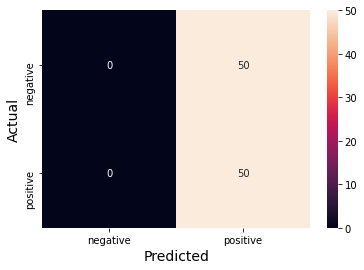

In [73]:
def TEST_plot_confusion_matrix():   
    dummy_y = np.ones([100, 1])
    dummy_y[len(dummy_y)//2:] = -1
    dummy_y_hat = np.ones([100, 1])

    class_name_key = {
        -1: 'negative',
        1: 'positive'
    }

    plot_confusion_matrix(
        y=dummy_y, 
        y_hat=dummy_y_hat, 
        class_name_key=class_name_key
    );
    
TEST_plot_confusion_matrix()
garbage_collect(['TEST_plot_confusion_matrix'])

### Defining PPV/precision 
Using the confusion matrix we can compute new metrics such as 
*positive predictive value* (PPV), also called *precision*. Recall PPV computes the accuracy for the positive predictions. In other words, PPV computes the ratio between the positive predictions that were correct over the total number of positive predictions made.

$$
\text{PPV} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

#### TODO 9
Complete the TODO function by converting the PPV equation into code so that we can compute the PPV score for our data later on.

1. Compute and return the PPV score using the above PPV equation. Recall, `tp` stands for true positive and `fp` stands for false positive. 

In [76]:
def ppv(tp, fp):
    # TODO 9.1
    return tp / (tp + fp)

Run the below `TEST_ppv()` function to test your `ppv()` function.

In [77]:
def TEST_ppv():
    ppv_score = ppv(tp=100, fp=3)

    todo_check([
        (np.isclose(ppv_score, 0.9708, rtol=.01), "ppv_score is incorrect")
    ])
    
TEST_ppv()
garbage_collect(['TEST_ppv'])

Your code PASSED the code check!


### Defining TPR/recall 

Using the confusion matrix we can compute new metrics such as *true positive rate* (TPR), also called *sensitivity* or *recall*. Recall TPR computes the ratio between the number of positive predictions that were correct over the total number of actual (i.e., *true*) positive class samples. This is a good measure to use for imbalanced datasets if your positive class is the minority class (i.e., the positive class has fewer data samples than the negative class)!

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

#### TODO 10
Complete the TODO function by converting the TPR equation into code so that we can compute the TPR score for our data later on.

1. Compute and return the TPR score using the above TPR equation. Recall, `tp` stands 
for true positive and `fn` stands for false negative. 

In [74]:
def tpr(tp, fn):
    # TODO 10.1
    return tp / (tp + fn)

Run the below `TEST_tpr()` function to test your `tpr()` function.

In [92]:
def TEST_tpr():
    tpr_score = tpr(tp=100, fn=1)

    todo_check([
        (np.isclose(tpr_score,  0.99009, rtol=.01), "tpr_score is incorrect")
    ])
    
TEST_tpr()
garbage_collect(['TEST_tpr'])

Your code PASSED the code check!


### Defining TNR/specificity 

Using the confusion matrix we can compute new metrics such as *true negative rate (TNR)*, also called *specificity*. Recall, TNR computes the accuracy of negative predictions. In other words, TNR computes the ratio between the number of negative predictions that were correct over the total number of actual (i.e., *true*) negative class samples. This is a good measure to use for imbalanced datasets if your negative class is the minority class (i.e., the negative class has fewer data samples than the positive class)!

$$
\text{TNR} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

#### TODO 11
Complete the TODO function by converting the TNR equation into code so that we can compute the TNR score for our data later on.

1. Compute and return the TNR score using the above TNR equation. Recall, `tn` stands for true negative and `fp` stands for false positive. 

In [78]:
def tnr(tn, fp):
    # TODO 11.1
    return tn / (tn + fp)

Run the below `TEST_tnr()` function to test your `tnr()` function.

In [79]:
def TEST_tnr():    
    tnr_score = tnr(tn=100, fp=40)

    todo_check([
        (np.isclose(tnr_score, 0.714285, rtol=.01), "tnr_score is incorrect")
    ])
    
TEST_tnr()
garbage_collect(['TEST_tnr'])

Your code PASSED the code check!


## Plots

Below we define a simple plot that plots our predictions `y_hat` against the ground truth labels `y`. Prediction `y_hat` are plotted as using 'xr' and labels `y` are plotted using 'ob'. If a prediction and label match they will be plotted on top of one another.


In [80]:
def plot_preds_vs_true(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    title: str, 
    dataset: str,
    xlabel: str = None,
    ylabel: str = None
) -> Tuple[np.ndarray, float, float, float]:

    
    plt.plot(y.reshape(-1,1), 'ob', label='y')
    plt.plot(y_hat.reshape(-1,1), 'xr', label='y_hat')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.legend()
    plt.show()

Additionally, the below function simply plots the decision boundary for problems that have only three weights where one weight is for the bias, and the remaining two are for the two data features. If you have more than three weights (i.e., more than two features) this function will fail as we can't visualize higher dimensions.

In [81]:
def plot_decision_boundry(
    X, y, w,
    class_name_key: dict=None,
    title: str = '',
    xlabel: str = '',
    ylabel: str = '',
) -> None:
    if len(w) > 3:
        raise ValueError("To plot boundary requires at most 3 weights")
        
    # Create decision boundary
    line_X = np.linspace(np.min(X[:, 1])-1, np.max(X[:, 1])+1, len(X)).reshape(-1,1)
    slope = -(w[0] / w[2]) / (w[0] / w[1])
    y_intercept = -w[0]/ w[2]
    decision_boundry = slope * line_X + y_intercept
    
    # Find data samples for each class
    neg = np.where(y == -1)[0]
    pos = np.where(y == 1)[0]
    
    # set class name to dict if None
    if class_name_key is None:
        class_name_key = {}
    # Get class names if the binary keys exist
    pos_label = class_name_key.get(1, '1')
    neg_label = class_name_key.get(-1, '-1')
    # Plot
    plt.plot(X[pos, 1], X[pos, 2], 'xr', label=pos_label)
    plt.plot(X[neg, 1], X[neg, 2], 'ob', label=neg_label)
    plt.plot(line_X, decision_boundry)
    plt.ylim(np.min(X[:, 2])-1, np.max(X[:, 2])+1)
    plt.xlim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

#  Rosenblatt's Perceptron with pocket
Let's now implement the perceptron with pocket algorithm. Recall from our notes that the perceptron algorithm predicts binary classes. The required targets for this algorithm are -1 and 1. This is because the algorithm classifies a data sample as the positive class (label = 1) if the value of the prediction is greater than 0. Likewise, the algorithm classifies a data sample as the negative class (label = -1) if the value of the prediction is less than or equal to zero. When the output is exactly zero we arbitrarily assign it the label -1, however this is usually rare.

$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv - T > 0 \\
-1  \quad &\text{else} \\
\end{cases}
$$

Recall, Rosenblatt came up with the following **online learning** weight update rule <u>that is only applied to misclassified samples</u>:

$$
\wv_{k+1} = \wv_k + \alpha y_i \xv_i
$$

where in this equation:
- $\wv_{k+t}$ are our weights AFTER being updated. 
- $\wv_{k}$ are our weights BEFORE being updated.
- $k$ is just notation to help us distinguish the weights before being updated and $k+1$ is used to help us distinguish the weights after being updated.
- $\alpha$ is the learning rate
- $y_i$ is the label for the current data sample
- $\xv_i$ is the current data sample's feature vector.
- $i$ is just used to indicate which data sample we are currently using for the update.

Further recall, one of the major downfalls of the perceptron is that if the data is non-separable then the learned weights simply correspond to the weights learned on the last epoch. The issue here is that these weights might not have actually been the best weights! Often times, the perceptron can diverge from a good solution that was found much earlier in training!

The goal of the pocket algorithm is to make a small change to the perceptron such that it saves the best weights. What does "best" mean here? Well, best here is defined as the weights that produce the least number of misclassifed samples!


#### TODO 12
Compete the TODO by finishing the `PocketPerceptron` class implementation. Remember, this is an **online algorithm** so we loop over one data sample at a time. **If you are having trouble, reference the shape outputs when running the test code below. Also, reference the notes for help!**


**`fit()` TODOs**
1. First, start by randomly initializing our weights `self.w`. To do so, use the `rng.rand()` function and pass the **number of features** in our data `X` as we have done in prior labs. Store the output into `self.w`

2. Initialize the best weights `self.w_best` by creating a copy of `self.w`. To do so, call the `.copy()` method on `self.w` and store the output into `self.w_best`.

3. Compute the continuous prediction `z` for the current data sample by computing the dot product between the weights `self.w` and the current data sample's features. 
    1. Hint: Remember `i` corresponds to the index of the current data sample. 

4. Convert the continuous prediction `z` to a discrete class label for the current data sample by taking the sign of `z`. To do so, use NumPy's `np.sign()` function. Store the output into `y_hat`.

5. Check if the prediction `y_hat` was misclassified by writing an if-statement that checks if the current prediction `y_hat` **does not equal** the current data sample's label.
    1. Hint: In python we use `!=` for not equal to.

6. Compute the weight update for `self.w` by converting Rosenblatt's weight update equation $\wv_{k+1} = \wv_k + \alpha y_i \xv_i$ into code. Store the output into `self.w`.
   

**`replace_best_weights()` TODOs**

Determine which weights are performing the best by looking at which wights misclassify the least number of data samples.

7. Compute the predicted class labels for **ALL** of the data `X` using the current weights `self.w`. Store the output into `preds_w`.  Once stored, reshape `preds_w` into a 2D array by using calling the `.reshape(-1, 1)` method and storing the output back into `preds_w`. This will prevent any future shape errors!

8. Compute the predicted class labels for **ALL** of the data `X` using the current best weights `self.w_best`. Store the output into `preds_w_best`. Once stored, reshape `preds_w_best` into a 2D array by using calling the `.reshape(-1, 1)` method and storing the output back into `preds_w_best`. This will prevent any future shape errors!

9. Compute the total number of correct predictions when using the `self.w` weights. Store the output into `total_corr_w`.
    1. Refer section on accuracy in the notes and this lab if you are confused as it will show you how to do this exactly!

10. Compute the total number of correct predictions when using the **best weights** `self.w_best`. Store the output into `total_corr_w_best`.
    1. Refer section on accuracy in the notes and this lab if you are confused as it shows you how to do this exactly!

**`predict()` TODOs**

11. Compute the predicted labels by using the **best** weights `self.w_best` and return the output. Make sure to reshape the predictions into a 2D array by using `.reshape(-1, 1)` as we have done above. This will help prevent shape errors when comparing our predictions `y_hat` and labels `y`.
    1. Hint: Remember to apply the sign function `np.sign()`.

In [ ]:
class PocketPerceptron():
    def __init__(self, alpha=0.1, epochs=1, debug=False):
        self.alpha = alpha
        self.epochs = epochs
        self.w = None
        self.debug = debug
    
    def fit(self, X, y):
        # Number of data samples
        m_samples = X.shape[0]
        
        rng = np.random.RandomState(42)
        # TODO 12.1
        self.w = 
        
        # TODO 12.2
        self.w_best = 
        
        if self.debug:
            print(f"X shape: {X.shape}")
            print(f"y shape: {y.shape}")
            
        # Loop over dataset multiple times
        for e in range(self.epochs):
            print(f"Epoch {e+1}")
            misclassified = 0
            # Loop over all samples
            for i in range(m_samples):
                
                if self.debug: 
                    print("-"*50)
                    print(f"\tself.w shape BEFORE  update: {self.w.shape}")
                    print(f"\tX[i] value: {X[i]} \n\tX[i] shape: {X[i].shape}")
                    print(f"\ty[i] value: {y[i]} \n\ty[i] shape: {y[i].shape}")
                    
                # TODO 12.3
                z =  
                
                if self.debug: print(f"\tz value: {z} \n\tz shape: {z.shape}")
                
                # TODO 12.4
                y_hat =
                
                if self.debug: print(f"\ty_hat value: {y_hat} \n\ty_hat shape: {y_hat.shape}")
                
                # TODO 12.5
                
                    # TODO 12.6
                    self.w = 
                    
                    if self.debug: print(f"\tself.w shape AFTER update: {self.w.shape}")
                    
                    # Update best weights
                    replace_wights = self.replace_best_weights(X, y)
                    if replace_wights is True:
                        print(f"\tUpdating best weights based on data sample {i+1}...")
                        self.w_best[:] = self.w[:]


                    misclassified += 1
            
            print(f"\tData samples misclassified: {misclassified}")      
            
            # Convergence check to see if we are no longer
            # misclassifing data samples
            if misclassified == 0:
                print(f"Converged at epoch: {e+1}")
                break
                
        print(f"Epochs trained: {e+1}")
        
    def replace_best_weights(self, X, y):
        # TODO 12.7
        preds_w = 
        # TODO 12.8
        preds_w_best = 
        
        if self.debug: 
            print(f"\tpreds_w shape: {preds_w.shape}")
            print(f"\tpreds_w_best shape: {preds_w_best.shape}")

        # TODO 12.9
        total_corr_w = 
        # TODO 12.10
        total_corr_w_best =
                  
        if self.debug: 
            print(f"\ttotal_corr_w out of total samples: {total_corr_w}/{len(y)}")
            print(f"\ttotal_corr_w_best out of total samples: {total_corr_w_best}/{len(y)}")
            
        if len(preds_w.shape) <= 1 or len(preds_w_best.shape) <= 1:
            print(f"\ttotal_corr_w out of total samples: {total_corr_w}/{len(y)}")
            print(f"\ttotal_corr_w_best out of total samples: {total_corr_w_best}/{len(y)}")
            err = "WARNING: This exception is being thrown because either " \
                "preds_w or preds_w_best is a 1D array. This exception is here " \
                "to help prevent NumPy from automatically braodcasting and " \
                "breaking the total correct count. Look at the above print statements "\
                "and notice how we have more correct predictions than data samples! " \
                "To fix this reshape both preds_w and preds_w_best to be 2D arrays " \
                "using .reshape(-1, 1)"
            raise ValueError(err)
        
        # Check if total_corr_w correctly classified more
        # samples than total_corr_w_best. If so, return True.
        if total_corr_w > total_corr_w_best:
            return True
        else:
            return False

        
    def predict(self, X):
        # TODO 12.11
        return 

Run the below `TEST_perceptron()` function to check your implementation using toy data. Set the `debug` argument below when calling the `test_perceptron()` to `False` to disable shape debug information. 

X shape: (100, 3)
y shape: (100, 1)
Epoch 1
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [ 1.         -0.50328585 -1.1382643 ] 
	X[i] shape: (3,)
	y[i] value: [-1.] 
	y[i] shape: (1,)
	z value: -0.9371435087359904 
	z shape: ()
	y_hat value: -1.0 
	y_hat shape: ()
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [ 1.         -0.35231146  0.52302986] 
	X[i] shape: (3,)
	y[i] value: [-1.] 
	y[i] shape: (1,)
	z value: 0.4224472579846624 
	z shape: ()
	y_hat value: 1.0 
	y_hat shape: ()
	self.w shape AFTER update: (3,)
	preds_w shape: (100, 1)
	preds_w_best shape: (100, 1)
	total_corr_w out of total samples: 99/100
	total_corr_w_best out of total samples: 95/100
	Updating best weights based on data sample 2...
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [ 1.         -1.23415337 -1.23413696] 
	X[i] shape: (3,)
	y[i] value: [-1.] 
	y[i

--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [1.         7.26696981 4.30237764] 
	X[i] shape: (3,)
	y[i] value: [1.] 
	y[i] shape: (1,)
	z value: 7.983379840862116 
	z shape: ()
	y_hat value: 1.0 
	y_hat shape: ()
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [1.         4.44609036 3.87105589] 
	X[i] shape: (3,)
	y[i] value: [1.] 
	y[i] shape: (1,)
	z value: 5.36847701146697 
	z shape: ()
	y_hat value: 1.0 
	y_hat shape: ()
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [1.         0.67659077 3.95407662] 
	X[i] shape: (3,)
	y[i] value: [1.] 
	y[i] shape: (1,)
	z value: 2.261125478492319 
	z shape: ()
	y_hat value: 1.0 
	y_hat shape: ()
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [1.         4.10432178 8.26646049] 
	X[i] shape: (3,)
	y[i] value: [1.] 
	y[i] shape: (1,)
	z valu

	X[i] shape: (3,)
	y[i] value: [-1.] 
	y[i] shape: (1,)
	z value: -2.828933845228116 
	z shape: ()
	y_hat value: -1.0 
	y_hat shape: ()
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [ 1.         -1.54438272 -0.88907741] 
	X[i] shape: (3,)
	y[i] value: [-1.] 
	y[i] shape: (1,)
	z value: -2.440191893967196 
	z shape: ()
	y_hat value: -1.0 
	y_hat shape: ()
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [ 1.         -2.15099358 -0.62430198] 
	X[i] shape: (3,)
	y[i] value: [-1.] 
	y[i] shape: (1,)
	z value: -2.7927250312929344 
	z shape: ()
	y_hat value: -1.0 
	y_hat shape: ()
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [ 1.         -1.60063869 -1.29169375] 
	X[i] shape: (3,)
	y[i] value: [-1.] 
	y[i] shape: (1,)
	z value: -2.7235327950333064 
	z shape: ()
	y_hat value: -1.0 
	y_hat shape: ()
----------------------------------------

	z shape: ()
	y_hat value: 1.0 
	y_hat shape: ()
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [1.         4.39397216 6.26403766] 
	X[i] shape: (3,)
	y[i] value: [1.] 
	y[i] shape: (1,)
	z value: 6.728950269609349 
	z shape: ()
	y_hat value: 1.0 
	y_hat shape: ()
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [1.         1.21575737 4.31979522] 
	X[i] shape: (3,)
	y[i] value: [1.] 
	y[i] shape: (1,)
	z value: 2.9271397123214458 
	z shape: ()
	y_hat value: 1.0 
	y_hat shape: ()
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [1.         4.4501302  5.35415694] 
	X[i] shape: (3,)
	y[i] value: [1.] 
	y[i] shape: (1,)
	z value: 6.242086238569753 
	z shape: ()
	y_hat value: 1.0 
	y_hat shape: ()
--------------------------------------------------
	self.w shape BEFORE  update: (3,)
	X[i] value: [1.         1.85753852 1.71290206] 
	X[i] shape

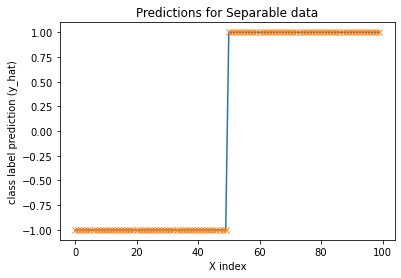

Your code PASSED the code check!


In [ ]:
def TEST_perceptron(debug):
    # Generate toy data
    rng = np.random.RandomState(42)
    mu1 = [-1, -1]
    cov1 = np.eye(2)
    C1 = rng.multivariate_normal(mu1, cov1, 50)
    mu2 = [4,4]
    cov2 = np.eye(2) * 3
    C2 = rng.multivariate_normal(mu2, cov2, 50)
    y = np.ones(len(C1)+len(C2)).reshape(-1, 1)
    y[:len(y)//2] = -1

    # Combine class data
    X = np.vstack((C1, C2))
    m_samples = len(X)
    # Add bias
    X1 = np.hstack([np.ones((m_samples, 1)), X])
    
    perceptron = PocketPerceptron(alpha=.5, epochs=5, debug=debug)
    perceptron.fit(X1, y)
    y_hat = perceptron.predict(X1)
    
    print("{:-^50}".format("Results"))
    acc = accuracy(y, y_hat)
    
    plt.plot(y)
    plt.plot(y_hat, 'x')
    plt.title("Predictions for Separable data")
    plt.xlabel("X index")
    plt.ylabel("class label prediction (y_hat)")
    plt.show()
    
    todo_check([
        (y_hat.shape == y.shape, f"'y_hat' shape does not match the shape of {y.shape}"),
        (np.isclose(acc, 1, rtol=.01), "Accuracy value was incorrect")
    ])
    
TEST_perceptron(debug=True)
garbage_collect(['TEST_perceptron'])

# Setosa vs All

Let's start by formulating the our classification problem as setosa-vs-all. Remember, this means that we want to classify each data sample as either setosa or not. Here setosa will be the positive class (label = 1) and versicolor and virginicas will be the negative class (label = -1).

## Petal length and width

When we plotted the petal length against the petal width we could clearly see that the Iris setosas could be separated from the other iris types (revisit TODO 4's plot). Let's see if the perceptron can find a decision boundary to easily separate the setosas from the rest of the irises as we observed previously.

### Training

#### TODO 13
Complete the TODO by getting our data, training the `PocketPerceptron` class and making predictions for our training and validation data.

1. Call the `data_prep()` function to get the setosa-vs-all data where the sepal length and width features are dropped. To do so, pass the arguments corresponding to the following descriptions:
    1. Pass the Iris dataset.
    1. Set setosa as the positive class.
    1. Set versicolor and virginica to represent the negative class.
    1. Set the column 'class' to act as the labels/targets.
    1. Drop the 'sepal length' and 'sepal width' features.
    1. Return all data as NumPy arrays.
1. Create an instance of the `PocketPerceptron`. Make sure to pass the arguments corresponding to the following descriptions: 
    1. Allow for training to occur for 10 passes over the data.

In [83]:
# TODO 13.1
data = data_prep(iris_df, pos_class=['setosa'], neg_class=['versicolor', 'virginica'], label_name='class', drop_features=['sepal length', 'sepal width'], return_array=True)
X_trn, y_trn, X_vld, y_vld, _, _, feature_names = data


# TODO 13.2
perceptron = PocketPerceptron(num_passes=10)

perceptron.fit(X_trn, y_trn)

y_hat_trn = perceptron.predict(X_trn)

todo_check([
    (np.all(feature_names == ['bias', 'petal length', 'petal width']), "features names for training and validation data incorrect! Make sure you dropped the right features."),
    (np.all(np.isclose(X_trn[4].flatten(), [1., 0.97932518, 1.17336698])), "'X_trn' values are incorrect"),
    (np.all(np.isclose(perceptron.w_best, np.array([-0.1254, -0.12089, -0.2218]), rtol=.1)), "best weight values potentially incorrect")
])

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

First, notice that our algorithm converges and ends training only after 2 epochs (see above output)! This is because the decision boundary found in the 2nd epoch misclassifies 0 training data samples!

Below, we plot our predicted classes against the actual ground truth labels. Recall, predictions are plotted as the red xs and the ground truth labels are plotted as the blue circles. If a prediction matches the ground truth then the red x will be plotted on top of the blue circle.

As we can see it looks like we predicted every training data sample's label correctly, although it is slightly hard to tell as the data samples are packed tightly!

In [84]:
plot_preds_vs_true(
    y=y_trn,
    y_hat=y_hat_trn,
    title="Training Predictions",
    dataset="Training",
    xlabel="Data Sample Index",
    ylabel="Class Labels [-1, 1]"
)

NameError: name 'y_trn' is not defined

Since we are only using 2 features (petal length and width) we can visualize the weights as forming a decision boundary. As we can see below, the learned weights clearly separate setosa from the rest of the iris flowers.

However, notice how close the line is to the 'not setosa' data samples. If we introduced new unseen data samples it could be prone to misclassifying them! 

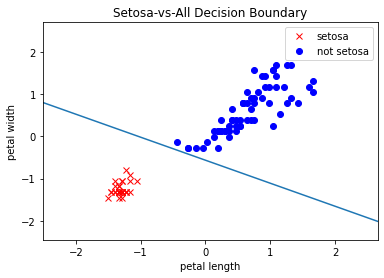

In [ ]:
plot_decision_boundry(
    X=X_trn, 
    y=y_trn, 
    w=perceptron.w_best,
    xlabel='petal length',
    ylabel='petal width',
    title='Setosa-vs-All Decision Boundary',
    class_name_key={1:'setosa', -1:"not setosa"}
)

Next, let's print out our metrics. Most of the time it is much hard for classification algorithms to visualize their results compared to regression. Therefore, most of our analysis is based on metrics and the confusion matrix.

Here we start by looking at our accuracy. As we expected from the above visualizations, we are getting 100% training accuracy.

In [85]:
trn_acc = accuracy(y_hat=y_hat_trn, y=y_trn)
print(f"Training accuracy: {trn_acc}")

NameError: name 'y_hat_trn' is not defined

Now let's plot the confusion matrix. Here our confusion matrix can be read as follows:

- 64 true negatives
- 0 false positives
- 0 false negatives
- 32 true positives

Note, the colors correspond to the number of samples where the large the number of samples the brighter the color.

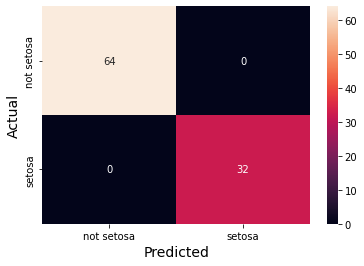

In [ ]:
plot_confusion_matrix(y_hat=y_hat_trn, 
                      y=y_trn,
                      class_name_key={1:'setosa', -1:"not setosa"});

Lastly, let's compute the scores for the PPV, TPR, and TNR. To do so, we quickly define the function `compute_scores()`.

In [ ]:
def compute_scores(y, y_hat):
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=y_hat).ravel()
    ppv_ = ppv(tp=tp, fp=fp) 
    tpr_ = tpr(tp=tp, fn=fn)
    tnr_ = tnr(tn=tn, fp=fp)
    
    print(f"PPV ratio tp/(tp+fp): {tp}/{tp+fp}")
    print(f"PPV (precision): {ppv_}\n")
    
    print(f"TPR ratio tp/(tp+fn): {tp}/{tp+fn}")
    print(f"TPR (recall/sensitivity): {tpr_}\n")
    
    print(f"TNR ratio tn/(tn+fp): {tn}/{tn+fp}")
    print(f"TNR specificity: {tnr_}")
    
    return ppv_, tpr_, tnr_

Once again, as expected, we see that all our scores report 100% correct!

In [ ]:
compute_scores(y_hat=y_hat_trn, y=y_trn);

PPV ratio tp/(tp+fp): 32/32
PPV (precision): 1.0

TPR ratio tp/(tp+fn): 32/32
TPR (recall/sensitivity): 1.0

TNR ratio tn/(tn+fp): 64/64
TNR specificity: 1.0


### Validate

Now, let's see how our validation data performs!

As we can see with the below two plots, we have correctly classified all the validation data as well!

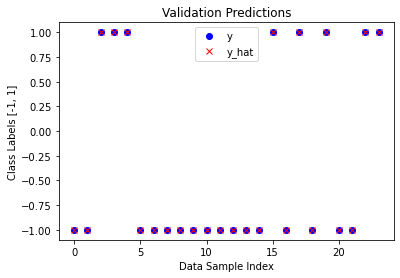

In [ ]:
y_hat_vld = perceptron.predict(X_vld)

plot_preds_vs_true(
    y=y_vld,
    y_hat=y_hat_vld, 
    title="Validation Predictions",
    dataset="Training",
    xlabel="Data Sample Index",
    ylabel="Class Labels [-1, 1]"
)

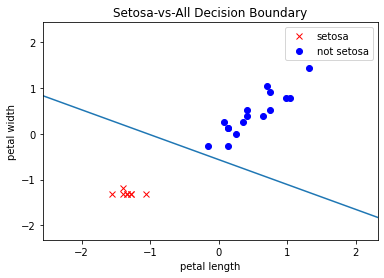

In [ ]:
plot_decision_boundry(
    X=X_vld, 
    y=y_vld, 
    w=perceptron.w_best,
    xlabel='petal length',
    ylabel='petal width',
    title='Setosa-vs-All Decision Boundary',
    class_name_key={1:'setosa', -1:"not setosa"}
)

As always, let's take a quick look at the validation accuracy, confusion matrix, and other scores.

In [ ]:
vld_acc = accuracy(y_hat=y_hat_vld, y=y_vld)
print(f"Validation accuracy: {vld_acc}")

Accuracy ratio: 24/24
Validation accuracy: 1.0


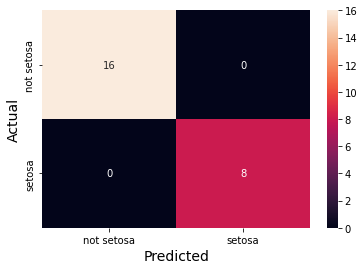

In [ ]:
plot_confusion_matrix(y_hat=y_hat_vld, 
                      y=y_vld,
                      class_name_key={1:'setosa', -1:"not setosa"});

In [ ]:
compute_scores(y_hat=y_hat_vld, y=y_vld);

PPV ratio tp/(tp+fp): 8/8
PPV (precision): 1.0

TPR ratio tp/(tp+fn): 8/8
TPR (recall/sensitivity): 1.0

TNR ratio tn/(tn+fp): 16/16
TNR specificity: 1.0


In [ ]:
# Remove data variables for this section from memory
garbage_collect(['X_trn', 'y_trn', 'X_vld', 'y_vld','y_hat_trn', 'trn_acc', 'y_hat_vld', 'vld_acc', 'perceptron', 'data', 'feature_names'])

#  Versicolor vs all

Alright, let's move on to a much harder problem. This time, let's formulate the classification problem as versicolor-vs-all. Remember, this means that we want to classify each data sample as either versicolor or not. Here versicolor will be the positive class (label = 1) and setosa and virginica will be the negative class (label = -1).

## Petal length and width
Let's first try solving this problem using the petal features only!

Recall that when we plotted the petal length against the petal width we could see that the versicolor data samples were plotted directly in the middle  between the setosa and virginica data samples (revisit TODO 4's plot). This means, versicolor-vs-all is not linearly separable when using 2 dimensions! 

Let's see how the perceptron reacts when using data the is not linearly separable and thus there is no linear decision boundary to easily separate the versicolor from the rest of the iris data samples.

### Train

#### TODO 14
Complete the TODO by getting our data, training the `PocketPerceptron` class and making predictions for our training and validation data.

1. Call the `data_prep()` function to get the versicolor-vs-all data where the sepal length and width features are dropped. To do so, pass the arguments corresponding to the following descriptions:
    1. Pass the Iris dataset.
    1. Set versicolor  as the positive class.
    1. Set setosa and virginica to represent the negative class.
    1. Set the column 'class' to act as the labels/targets.
    1. Drop the 'sepal length' and 'sepal width' features.
    1. Return all data as NumPy arrays.
    
1. Create an instance of the `PocketPerceptron`. Make sure to pass the arguments corresponding to the following descriptions: 
    1. Allow for training to occur for 10 passes over the data.

In [89]:
# TODO 14.1
data = data_prep(iris_df, pos_class=['versicolor'], neg_class=['setosa', 'virginica'], label_name='class', drop_features=['sepal length', 'sepal width'], return_array=True)
X_trn, y_trn, X_vld, y_vld, _, _, feature_names = data

# TODO 14.2
perceptron = PocketPerceptron(num_passes=10)

perceptron.fit(X_trn, y_trn)

y_hat_trn = perceptron.predict(X_trn)

todo_check([
    (np.all(feature_names == ['bias', 'petal length', 'petal width']), "features names for training and validation data incorrect! Make sure you dropped the right features."),
    (np.all(np.isclose(X_trn[4].flatten(), [1., 0.95237765, 1.14980508])), "'X_trn' values are incorrect"),
    (np.all(np.isclose(perceptron.w_best, np.array([-0.02545988,  0.26595776, -0.2066903 ]), rtol=.1)), "best weight values potentially incorrect")
])

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

Looking at the above output from our algorithm we can we that we trained for the full 10 epochs. We can also see that we consistently misclassified  at least 44 samples every epoch.

Below we plot the decision boundary that our perceptron learn and oh boy does this look wrong. Since the perceptron is only able to create a **linear** decision boundary it finds the "optimal" linearly boundary. Meaning, the one that misclassifies the least number of samples. In this case, even the most optimal boundary performs poorly. 

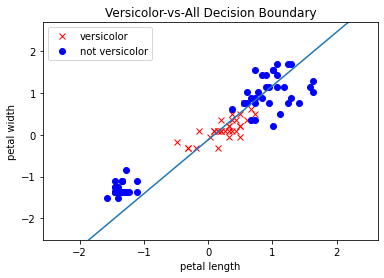

In [ ]:
plot_decision_boundry(
    X=X_trn, 
    y=y_trn, 
    w=perceptron.w_best,
    xlabel='petal length',
    ylabel='petal width',
    title='Versicolor-vs-All Decision Boundary',
    class_name_key={1:'versicolor', -1:"not versicolor"}
)

Welp, the below prediction vs label graph is really hard to make any sense of. This is an example of visualizations for classification problems being relatively poor outside simple problems. Let's look at our metrics instead!

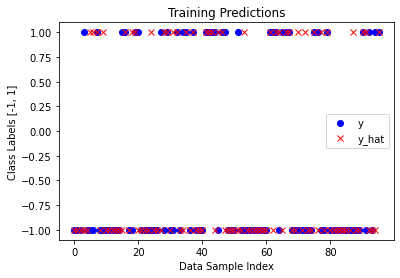

In [ ]:
plot_preds_vs_true(
    y=y_trn,
    y_hat=y_hat_trn,
    title="Training Predictions",
    dataset="Training",
    xlabel="Data Sample Index",
    ylabel="Class Labels [-1, 1]"
)

As we can see below, our accuracy actually isn't as bad as it looks. Having a 70% accuracy is low but it isn't awful. Keep in mind having an accuracy below 50% is the worst as you are better off using an algorithm that randomly predicts the values. Thus, anything above 50% usually is considered promising.

In [ ]:
trn_acc = accuracy(y_hat=y_hat_trn, y=y_trn)
print(f"Training accuracy: {trn_acc}")

Accuracy ratio: 68/96
Training accuracy: 0.7083333333333334


Now let's plot the confusion matrix. Here our confusion matrix can be read as follows:

- 49 true negatives
- 15 false positives
- 13 false negatives
- 19 true positives

From this break down, we can tell that the classifier is having a much easier time classifying the negative samples compared to the positive samples. Let's see how this affects our PPV, TPR, and TNR scores.

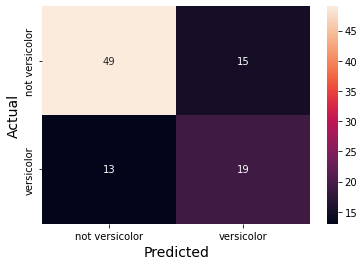

In [ ]:
plot_confusion_matrix(y_hat=y_hat_trn, 
                      y=y_trn,
                      class_name_key={1:'versicolor', -1:"not versicolor"});

Wow, these scores are looking much worse than the accuracy. Notice that PPV and TPR are below 60% while TNR is nearing 80%! Why is this? Recall that PPV and TPR are focused on computing how well the positive class is being classified while TNR is focused on who well the negative class is being classified. Having a high TNR and a lower TPR and PPV usually indicates to us that our model is misclassifying more positive class data samples than negative class data samples! 

In [ ]:
compute_scores(y_hat=y_hat_trn, y=y_trn);

PPV ratio tp/(tp+fp): 19/34
PPV (precision): 0.5588235294117647

TPR ratio tp/(tp+fn): 19/32
TPR (recall/sensitivity): 0.59375

TNR ratio tn/(tn+fp): 49/64
TNR specificity: 0.765625


### Validate

As always, let's see how our validation data does!

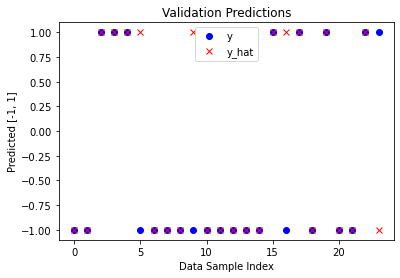

In [ ]:
y_hat_vld = perceptron.predict(X_vld)

plot_preds_vs_true(
    y=y_vld,
    y_hat=y_hat_vld,
    title="Validation Predictions",
    dataset="Validation",
    xlabel="Data Sample Index",
    ylabel="Predicted [-1, 1]"
)

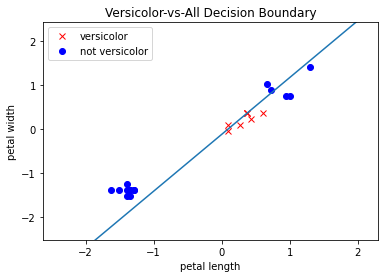

In [ ]:
plot_decision_boundry(
    X=X_vld, 
    y=y_vld, 
    w=perceptron.w_best,
    xlabel='petal length',
    ylabel='petal width',
    title='Versicolor-vs-All Decision Boundary',
    class_name_key={1:'versicolor', -1:"not versicolor"}
)

In [ ]:
vld_acc = accuracy(y_hat=y_hat_vld, y=y_vld)
print(f"Validation accuracy: {vld_acc}")

Accuracy ratio: 20/24
Validation accuracy: 0.8333333333333334


Here our confusion matrix can be read as follows:

- 13 true negatives
- 3 false positives
- 1 false negatives
- 7 true positives


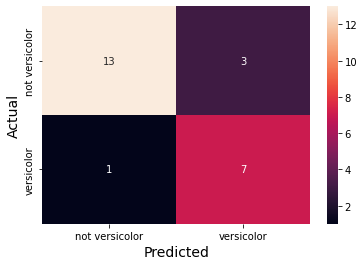

In [ ]:
plot_confusion_matrix(y_hat=y_hat_vld, 
                      y=y_vld,
                      class_name_key={1:'versicolor', -1:"not versicolor"});

In [ ]:
compute_scores(y_hat=y_hat_vld, y=y_vld);

PPV ratio tp/(tp+fp): 7/10
PPV (precision): 0.7

TPR ratio tp/(tp+fn): 7/8
TPR (recall/sensitivity): 0.875

TNR ratio tn/(tn+fp): 13/16
TNR specificity: 0.8125


Ah well, the validation scores are actually much higher. Notice that this is because most of the positive validation class samples fall under the line which means all data samples under the decision boundary are classified as the positive class while all data samples on top of the decision boundary are classified as the negative class.  

In [ ]:
# Remove data variables for this section from memory
garbage_collect(['X_trn', 'y_trn', 'X_vld', 'y_vld','y_hat_trn', 'trn_acc', 'y_hat_vld', 'vld_acc', 'perceptron', 'data', 'feature_names'])

## All Features

While Iris versicolor may not be linearly separable in two dimensions, let's see what happens when we use 4 dimensions. To do so, we'll use both the petal and sepal features.

### Train

#### TODO 15
Complete the TODO by getting our data, training the `PocketPerceptron` class and making predictions for our training and validation data.

1. Call the `data_prep()` function to get the versicolor-vs-all data. To do so, pass the arguments corresponding to the following descriptions:
    1. Pass the Iris dataset.
    1. Set versicolor as the positive class.
    1. Set setosa and virginica to represent the negative class.
    1. Set the column 'class' to act as the labels/targets.
    1. Return all data as NumPy arrays.
    
1. Create an instance of the `PocketPerceptron`. Make sure to pass the arguments corresponding to the following descriptions: 
    1. Allow for training to occur for 10 passes over the data.

In [91]:
# TODO 15.1
data = data_prep(iris_df, pos_class=['versicolor'], neg_class=['setosa', 'virginica'], label_name='class', return_array=True)
X_trn, y_trn, X_vld, y_vld, _, _, feature_names = data

# TODO 15.2
perceptron = PocketPerceptron(num_passes=10)

perceptron.fit(X_trn, y_trn)

y_hat_trn = perceptron.predict(X_trn)

todo_check([
    (np.all(np.isclose(X_trn[4].flatten(), [1., 1.13365878, -0.15635243,  0.95237765,  1.14980508])), "'X_trn' values are incorrect"),
    (np.all(np.isclose(perceptron.w_best, np.array([-0.12545988,  0.15590326, -0.25504385,  0.18552363, -0.2858944 ]), rtol=.1)), "best weight values potentially incorrect")
])

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

Looking at the above output from our algorithm again, we can see that we trained for the full 10 epochs. We can also see that we consistently misclassified at least 33 samples every epoch this time.

Once again, looking prediction vs ground truth plot below isn't very useful. Further, notice that there is no more decision boundary plot. This is because we are using 4 dimensions (5 including the bias) which means we can't visualize our decision boundary as easily as before - at least without some advanced tricks.

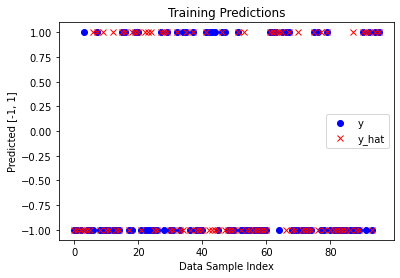

In [ ]:
plot_preds_vs_true(
    y=y_trn,
    y_hat=y_hat_trn,
    title="Training Predictions",
    dataset="Training",
    xlabel="Data Sample Index",
    ylabel="Predicted [-1, 1]"
)

Looking at our metrics we can see our classification score has increased to about 77%. So far things seem to improved at least slightly.

In [ ]:
trn_acc = accuracy(y_hat=y_hat_trn, y=y_trn)
print(f"Training accuracy: {trn_acc}")

Accuracy ratio: 74/96
Training accuracy: 0.7708333333333334


Here our confusion matrix can be read as follows:

- 50 true negatives
- 14 false positives
- 8 false negatives
- 24 true positives

Notice, our algorithm is slightly better at predicting the positive class  while still predicting the negative class at the same rate. Let's confirm this by looking at our other metrics.

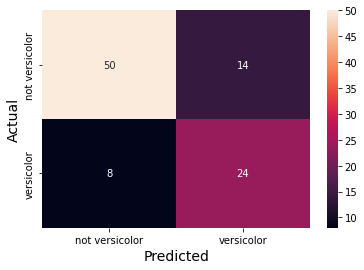

In [ ]:
plot_confusion_matrix(y_hat=y_hat_trn, 
                      y=y_trn,
                      class_name_key={1:'versicolor', -1:"not versicolor"});

As we can see, all scores improved as we suspected - we'll at least for our training data.

In [ ]:
compute_scores(y_hat=y_hat_trn, y=y_trn);

PPV ratio tp/(tp+fp): 24/38
PPV (precision): 0.631578947368421

TPR ratio tp/(tp+fn): 24/32
TPR (recall/sensitivity): 0.75

TNR ratio tn/(tn+fp): 50/64
TNR specificity: 0.78125


### Validate

Now, let's see how well 4 dimensions does on our validation data.

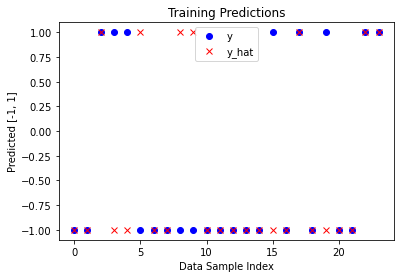

In [ ]:
y_hat_vld = perceptron.predict(X_vld)

plot_preds_vs_true(
    y=y_vld,
    y_hat=y_hat_vld,
    title="Training Predictions",
    dataset="Training",
    xlabel="Data Sample Index",
    ylabel="Predicted [-1, 1]"
)

Surprisingly, we can see we get worse performance on our validation dataset. We have gone from roughly 80% accuracy to 70%! Hmm what is causing this?

In [ ]:
vld_acc = accuracy(y_hat=y_hat_vld, y=y_vld)
print(f"Validation accuracy: {vld_acc}")

Accuracy ratio: 17/24
Validation accuracy: 0.7083333333333334


Here our confusion matrix can be read as follows:

- 13 true negatives
- 3 false positives
- 4 false negatives
- 4 true positives

Looking at the confusion matrix we can see the new decision boundary misclassified more positive class samples. When comparing to the results when using only the petal features, we have gone from 7 true positive to 4. Meaning, our false negatives have increased while our true positives decreased. Everything else has remained the same.

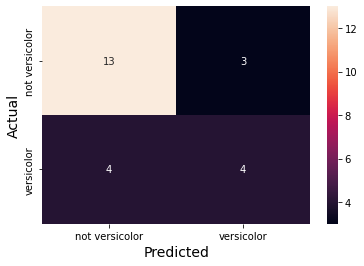

In [ ]:
plot_confusion_matrix(y_hat=y_hat_vld, 
                      y=y_vld,
                      class_name_key={1:'versicolor', -1:"not versicolor"});

Looking at the PPV and TPR scores we can see they have decreased due to the decrease in true positives. 

In [ ]:
compute_scores(y_hat=y_hat_vld, y=y_vld);

PPV ratio tp/(tp+fp): 4/7
PPV (precision): 0.5714285714285714

TPR ratio tp/(tp+fn): 4/8
TPR (recall/sensitivity): 0.5

TNR ratio tn/(tn+fp): 13/16
TNR specificity: 0.8125


What gives? Well, what we really need is a non-linear classifier as simply adding more dimensions doesn't seem to be helping. We'll look at some of these in the coming weeks!

In [ ]:
# Remove data variables for this section from memory
garbage_collect(['X_trn', 'y_trn', 'X_vld', 'y_vld','y_hat_trn', 'trn_acc', 'y_hat_vld', 'vld_acc', 'perceptron', 'data', 'feature_names'])